# Load in and visualize the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/MacBook/Desktop/RNN/data/IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Data Processing — convert to lower case

In [3]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [4]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

# Data Processing — remove punctuation

In [5]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
df['clean_text'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation]))

In [7]:
df['clean_text'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [8]:
df['len_review'] = df['clean_text'].apply(lambda x:len(x))

In [9]:
df

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261
...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,962
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,616
49997,i am a catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,1235
49998,i'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,1206


#  Data Processing — create list of reviews

In [10]:
all_text2 = df['clean_text'].tolist()
all_text2[0:2]

['one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare f

### Tokenize — Create Vocab to Int mapping dictionary

In [11]:
from collections import Counter
all_text2 = ' '.join(all_text2)
# create a list of words
words = all_text2.split()

In [12]:
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [13]:
#vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}

In [14]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [15]:
vocab_to_int

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'br': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'he': 27,
 'one': 28,
 'its': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'who': 36,
 'so': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'if': 43,
 'has': 44,
 'out': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'my': 53,
 'even': 54,
 'no': 55,
 'up': 56,
 'would': 57,
 'she': 58,
 'time': 59,
 'only': 60,
 'which': 61,
 'really': 62,
 'their': 63,
 'see': 64,
 'were': 65,
 'story': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'than': 70,
 'we': 71,
 'much': 72,
 'well': 73,
 'been': 74,
 'get': 75,
 'will': 76,
 'other': 77,
 'do': 78,
 'great': 79,
 'also': 80,
 'into': 81,
 'bad': 82,
 'be

In [16]:
reviews_split = df['clean_text'].tolist()

##  Tokenize — Encode the words

In [17]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[28, 4, 1, 77, 1941, 44, 1063, 11, 100, 145, 40, 479, 3324, 393, 461, 26, 3190, 34, 23, 205, 14, 10, 6, 601, 48, 590, 15, 2137, 12, 1, 87, 146, 11, 3255, 69, 42, 3324, 13, 29, 5600, 2, 15378, 134, 4, 582, 61, 282, 7, 205, 35, 1, 670, 138, 1707, 69, 10, 6, 21, 3, 118, 16, 1, 8330, 5794, 39, 11861, 10, 118, 2508, 55, 6064, 15, 5636, 5, 1470, 381, 39, 582, 29, 6, 3407, 7, 1, 352, 340, 4, 1, 23503, 12, 8, 6, 469, 3324, 14, 11, 6, 1, 11516, 338, 5, 1, 16023, 6870, 2543, 1061, 61649, 8, 2637, 1375, 20, 25365, 536, 33, 4727, 2520, 4, 1, 1208, 112, 31, 1, 7153, 25, 2992, 13015, 2, 408, 61650, 37, 17529, 6, 21, 319, 20, 1, 5098, 3720, 536, 6, 344, 5, 81744, 8470, 41120, 15379, 5171, 7893, 2461, 2, 18404, 61651, 329, 9265, 7472, 13445, 2, 8721, 34936, 23, 109, 224, 5436, 12, 9, 57, 128, 1, 269, 1303, 4, 1, 118, 6, 668, 5, 1, 187, 11, 8, 262, 112, 77, 257, 548, 3001, 819, 178, 1271, 4349, 16, 2499, 1096, 819, 1412, 819, 81745, 148, 978, 181, 1, 87, 393, 9, 120, 201, 3255, 69, 14, 37, 1574, 8, 13

In [18]:
df.head()

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


### Tokenize — Encode the labels

In [19]:
labels_split = df['sentiment'].tolist()

In [20]:
import numpy as np
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

## Analyze Reviews Length

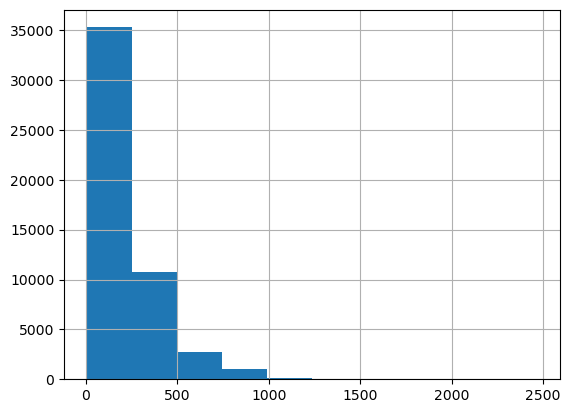

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [21]:
import matplotlib.pyplot as plt
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

###  Removing Outliers — Getting rid of extremely long or short reviews

In [22]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

### Padding / Truncating the remaining data

In [23]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [24]:
features = pad_features(reviews_int,200)

In [26]:
features[:10,:]

array([[   28,     4,     1, ...,   978,   181,     1],
       [    0,     0,     0, ...,  1900,    73,   223],
       [    0,     0,     0, ...,    64,    15,   333],
       ...,
       [    0,     0,     0, ...,    20,     1,   946],
       [    0,     0,     0, ..., 10151, 45601,    60],
       [    0,     0,     0, ...,    12,    79,  1215]])

In [27]:
len(features)

50000

In [28]:
len_feat = len(features)
split_frac = 0.8

### Training, Validation, Test Dataset Split

In [29]:
split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [30]:
type(test_y)

list

In [31]:
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_y = np.array(valid_y)

In [32]:
print(f'Train: {train_y.shape}, Test: {test_y.shape}, Valid: {valid_y.shape}')

Train: (40000,), Test: (5000,), Valid: (5000,)


## Dataloaders and Batching

In [33]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [34]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[     0,      0,      0,  ...,     10,     17,    189],
        [     0,      0,      0,  ...,     12,  15687,   7723],
        [    10,      6,      1,  ...,    136,     20,   5630],
        ...,
        [    35, 115629,   5919,  ...,   1439,    434,  35072],
        [     1,  25239,    641,  ...,      1,   2813,   6736],
        [     0,      0,      0,  ...,      4,     11,   6624]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0])


## Define the LSTM Network Architecture


In [35]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        """
        It changes the shape of lstm_out into a 2D matrix where each row represents a time step in the sequence and each column represents the outputs of the LSTM layer at that time step.
        """
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

## Training the Network

## Instantiate the network

In [36]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


181686 size of the corpus

In [38]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

## Training Loop

In [39]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [40]:
# training params

epochs = 4 

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
"""
net.train() : Met le modèle en mode d'entraînement, ce qui active le dropout et la normalisation en lot (batch normalization) si elles sont utilisées.
"""
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        #print(counter)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{} ".format(e+1, epochs),
                  "Step: {} ".format(counter),
                  "Loss: {:.6f} ".format(loss.item()),
                  "Val Loss: {:.6f} ".format(np.mean(val_losses)))

Epoch: 1/4  Step: 100  Loss: 0.681840  Val Loss: 0.658010 
Epoch: 1/4  Step: 200  Loss: 0.612270  Val Loss: 0.592949 
Epoch: 1/4  Step: 300  Loss: 0.682435  Val Loss: 0.699312 
Epoch: 1/4  Step: 400  Loss: 0.683918  Val Loss: 0.673240 
Epoch: 1/4  Step: 500  Loss: 0.517509  Val Loss: 0.549433 
Epoch: 1/4  Step: 600  Loss: 0.471688  Val Loss: 0.559710 
Epoch: 1/4  Step: 700  Loss: 0.550927  Val Loss: 0.470670 
Epoch: 1/4  Step: 800  Loss: 0.639147  Val Loss: 0.514846 
Epoch: 2/4  Step: 900  Loss: 0.526982  Val Loss: 0.546015 
Epoch: 2/4  Step: 1000  Loss: 0.463051  Val Loss: 0.481734 
Epoch: 2/4  Step: 1100  Loss: 0.297701  Val Loss: 0.459395 
Epoch: 2/4  Step: 1200  Loss: 0.383151  Val Loss: 0.439138 
Epoch: 2/4  Step: 1300  Loss: 0.338075  Val Loss: 0.429232 
Epoch: 2/4  Step: 1400  Loss: 0.327550  Val Loss: 0.412000 
Epoch: 2/4  Step: 1500  Loss: 0.424970  Val Loss: 0.379986 
Epoch: 2/4  Step: 1600  Loss: 0.367757  Val Loss: 0.380163 
Epoch: 3/4  Step: 1700  Loss: 0.159219  Val Loss:

### Testing
- On Test Data

In [41]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.356
Test accuracy: 0.854


### On User-generated Data
First, we will define a tokenize function that will take care of pre-processing steps and then we will create a predict function that will give us the final output after parsing the user provided review.


In [42]:
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

In [43]:
def preprocess(review, vocab_to_int):
    review = review.lower()
    word_list = review.split()
    num_list = []
    #list of reviews
    #though it contains only one review as of now
    reviews_int = []
    for word in word_list:
        if word in vocab_to_int.keys():
            num_list.append(vocab_to_int[word])
    reviews_int.append(num_list)
    return reviews_int

In [44]:
def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.
        
        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    #change the reviews to sequence of integers
    int_rev = preprocess(test_review, vocab_to_int)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, seq_length=seq_length)
    
    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)
    
    #pass the features to the model to get prediction
    net.eval()
    val_h = net.init_hidden(1)
    val_h = tuple([each.data for each in val_h])

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)
    
    #rounding the output to nearest 0 or 1
    pred = torch.round(output)
    
    #mapping the numeric values to postive or negative
    output = ["Positive" if pred.item() == 1 else "Negative"]
    
    # print custom response based on whether test_review is pos/neg
    print(output)

In [45]:
# positive test review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'

In [46]:
# call function
# try negative and positive reviews!
seq_length=200
predict(net, test_review_pos, seq_length)

['Positive']
